# <center>Problem Set 6</center>

## <center> Due March 12 at 10:00 pm

The McHenry County Water Resource Specialist is looking for new ways to view data that is being collected by the county. The USGS is currently collecting data in real-time for a number of wells in McHenry County. Your task in this assignment is to create a potentiometric surface, in real-time, of this data, as well as to look at a surface from summer of 2019 and compare the differences. <b>The wells you will be using for this assignment can be found in the Excel file 'gwmchenry_deep.xlsx'. The files contains columns that (respectively) contain USGS Site Number, Site Name, and Land Surface Elevation.</b>

<i>Note that the code should take into account the possibility for outliers. In particular, think about what happens if your code includes 'NaN' head values (which can and likely will happen at some point over the next two weeks).</i>  

###<center>Part I: Compile Data for Each Well</center>

Using Python, create a Pandas DataFrame that contains the USGS Site Number as the index and columns showing: 
<ul>
    <li>Site Name</li>
    <li>Latitude</li>
    <li>Longitude</li>
    <li>Land Surface Elevation</li>
    <li>Date-time of the most recent data point</li>
    <li>Head (in ft above MSL) of the most recent data point</li>
</ul>

<b>Remember that the USGS web service will return depth to water. You need to convert this to a head.</b>

### <center>Part II: Create maps from this data</center>

Create maps showing the:
<ul>
    <li>Potentiometric surface for Summer 2019 (you may use 200 days prior to the most recent data point)</li>
    <li>Potentiometric surface for today</li>
    <li>Head difference (ft) between the two surfaces</li>
</ul>

Make sure that maps include the following:
<ul>
    <li>State boundaries</li>
    <li>Contours with labels</li>
    <li>A title with the date in a readable format</li>
    <li>A color flood</li>
    <li>A color bar</li>
</ul>

<b>You are responsible to search the internet and determine a  way to assign a color flood and color bar.</b>

### <center>Part III: Comparison with a 2013 study</center>

Conduct a qualitative analysis on the potentiometric surface generated in this assignment with the potentiometric surface generated in a 2013 study (see page 71, Figure 42 of the following report: https://www.ideals.illinois.edu/handle/2142/50040). Write a paragraph discussing these differences (qualitatively). Include an image of Figure 42 in your Jupyter Notebook, with a reference to the report.

In [0]:
# CoLab recommends to run the following two lines of code to import cartopy. 
#You will likely need to reinstall each time you log into CoLab, but it doesn't take too long. 
#You can keep running this even after installed, because it will recognize the install quickly.
!apt-get -qq install python-cartopy python3-cartopy
import cartopy

# And here we install pykrige. Note that this differs from a normal pip install in that it requires a leading "!"
!pip install pykrige

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
# import data from online
import urllib, json
from datetime import datetime
import pylab  # using as a plotting library for spatial data (looking at the contours)
import numpy as np # array package 

# import cartopy, which we will use to map
import cartopy.crs as ccrs                   # import projections
import cartopy.feature as cf                 # import features


# import the UniversalKriging function from pykrige.uk 
from pykrige.uk import UniversalKriging

In [4]:
df = pd.read_excel('https://github.com/dbabrams/Week6PotSurface\
/blob/master/gwmchenry_deep.xlsx?raw=true', index_col=0)
for index, row in df.iterrows():
  siteNum=str(index)
  # URL with streamflow/groundwater data from the USGS
  url = 'https://waterservices.usgs.gov/nwis/iv/?format=json&sites='\
  + siteNum + '&parameterCd=72019&siteStatus=all'
  #open the URL
  response = urllib.request.urlopen(url)
  # read the data in as a dictionary
  gw_data = json.loads(response.read())
  df.loc[index,'Latitude']=gw_data['value']['timeSeries'][0]['sourceInfo']['geoLocation']['geogLocation']['latitude']
  df.loc[index,'Longitude']=gw_data['value']['timeSeries'][0]['sourceInfo']['geoLocation']['geogLocation']['longitude']
  df.loc[index,'Date-Time']=pd.to_datetime(gw_data['value']['timeSeries'][0]['values'][0]['value'][0]['dateTime'])
  df.loc[index,'Head']=df.loc[index,'elevation']-float(gw_data['value']['timeSeries'][0]['values'][0]['value'][0]['value'])
  df = df.drop(df[df['Head'] > 3000].index)
print(df)

                                                   SiteName  ...    Head
SiteNum                                                      ...        
421056088380801                    43N5E-27.4h1 (14-RIL-S)   ...  800.21
421120088281801                   43N7E-19.8d (HUNT-09-03)   ...  853.92
421122088222702                    43N7E-23.1d2 (16-GRF-D)   ...  859.70
421145088194802                    43N8E-20.6h2 (17-ALG-D)   ...  778.59
421321088341101                   43N6E-07.1g (MARS-09-01)   ...  859.38
421341088283703                    43N6E-01.3b3 (15-COR-D)   ...  842.94
421533088421801   44N5E-30.8c1 (10-MAR-S) (McHenry Co CRN)   ...  776.97
421547088142301                   44N9E-25.1d (WAUC-02-12)   ...  745.95
421626088311401                    44N6E-22.4c1 (11-SEN-I)   ...  827.25
421653088370901                   44N5E-23.5g (MARN-09-02)   ...  811.16
421653088370902                  44N5E-23.5g2 (MARN-10-03)   ...  802.00
421747088270701                  44N7E-17.8h1 (WOOD

In [24]:
print(df[['Date-Time']])

                                 Date-Time
SiteNum                                   
421056088380801  2020-03-26 23:15:00-06:00
421120088281801  2020-03-26 23:00:00-06:00
421122088222702  2020-03-26 23:00:00-06:00
421145088194802  2020-03-26 23:00:00-06:00
421321088341101  2020-03-26 23:00:00-06:00
421341088283703  2020-03-26 23:00:00-06:00
421533088421801  2020-03-26 23:00:00-06:00
421547088142301  2020-03-26 22:30:00-06:00
421626088311401  2020-03-26 23:00:00-06:00
421653088370901  2020-03-26 23:00:00-06:00
421653088370902  2020-03-26 23:00:00-06:00
421747088270701  2020-03-26 23:00:00-06:00
421820088154501  2020-03-26 22:45:00-06:00
421914088125301  2020-03-26 22:45:00-06:00
422032088222001  2020-03-26 23:00:00-06:00
422120088330901  2020-03-26 23:15:00-06:00
422142088303103  2020-03-26 23:15:00-06:00
422308088195602  2020-03-26 23:00:00-06:00
422308088231002  2020-03-26 23:00:00-06:00
422308088264201  2020-03-26 23:00:00-06:00
422433088140601  2020-03-26 23:00:00-06:00
42270408838

In [6]:
UK = UniversalKriging(df['Longitude'], df['Latitude'], df['Head'], variogram_model='spherical',nlags=6)
print(UK) 

In [22]:
# define the area over which to plot data
minlat = 42.1
maxlat = 42.6
minlong = -88.75
maxlong = -88.15
# create xpoints and ypoints in space, with 0.01 spacing
xpoints = np.arange(minlong,maxlong,0.01)
ypoints = np.arange(minlat,maxlat,0.01)

# create a meshgrid with xpoints and ypoints, to be used later in the code
X,Y = np.meshgrid(xpoints,ypoints)

# calculate the interpolated grid and fill values.
z, var = UK.execute('grid', xpoints,ypoints)
z = z.filled(fill_value=None)
print(z)

[[803.448488   802.12839737 801.36210058 ... 796.22223042 796.59725284
  797.20180863]
 [800.48860464 799.13130174 798.36270159 ... 793.25585257 793.74710235
  794.44082789]
 [797.48387224 796.09213467 795.30202013 ... 790.27356132 790.92281866
  791.71529736]
 ...
 [865.17205408 868.33711272 871.58060299 ... 842.95016113 844.00313544
  844.97568128]
 [864.75173421 867.94042973 871.19026048 ... 843.44992907 844.46642138
  845.40621688]
 [863.991343   867.10015064 870.33688332 ... 843.86334782 844.83821784
  845.73981713]]


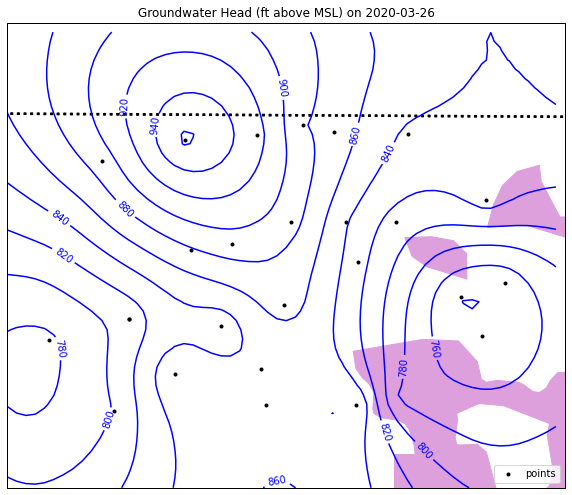

In [34]:
# Create a figure
fig = plt.figure(figsize=(10, 10))
# define a projection
ax = plt.axes(projection=ccrs.PlateCarree())
# define spatial domain to plot
ax.set_xlim(minlong,maxlong)
ax.set_ylim(minlat,maxlat)
# define title
ax.set_title("Head (ft above MSL)")
popplaces = cf.NaturalEarthFeature(category='cultural',name='urban_areas',
    scale='10m',facecolor='plum') 
states_provinces = cf.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces',scale='50m', facecolor='none')	
# adds the features defined above
ax.add_feature(popplaces,edgecolor='plum',linewidth=1.0)
ax.add_feature(states_provinces, edgecolor='black', linewidth=2.5,linestyle=':')
# create contours from the interpolation
cset = plt.contour(X,Y,z,np.arange(700, 1000, 20),colors='blue')
plt.contourf(X, Y, , 8, alpha = 0.75, cmap = plt.cm.hot)
# labels contours, makes use of pylab
pylab.clabel(cset, inline=1, fontsize=10,fmt='%1.0f')

# plot the points that were measured
plt.scatter(df['Longitude'], df['Latitude'], marker=".", color="black", label="points")
plt.legend(loc='lower right')
plt.title('Groundwater Head (ft above MSL) on '+str(df.iloc[0]['Date-Time'].date()))
plt.show()